# Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [1]:
import os
import pandas as pd
from botocore.client import Config
import ibm_boto3
import io
import matplotlib.pyplot as plt

# Define a function to load the pickle file from IBM COS
def load_pickle_from_cos(bucket, key, client):
    # Get the object from the bucket
    response = client.get_object(Bucket=bucket, Key=key)
    
    # Read the object content
    object_content = response['Body'].read()
    
    # Load the pickle file into a DataFrame
    df = pd.read_pickle(io.BytesIO(object_content))
    return df

# Initialize the COS client
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MjJB2foti-ACb0aum6tpr_MABhlskLbgK4djDXeXLltL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'task410-donotdelete-pr-fck0m7flgp8x29'
object_key = 'task4.9_part1.pkl'

# Load the DataFrame
df = load_pickle_from_cos(bucket, object_key, cos_client)

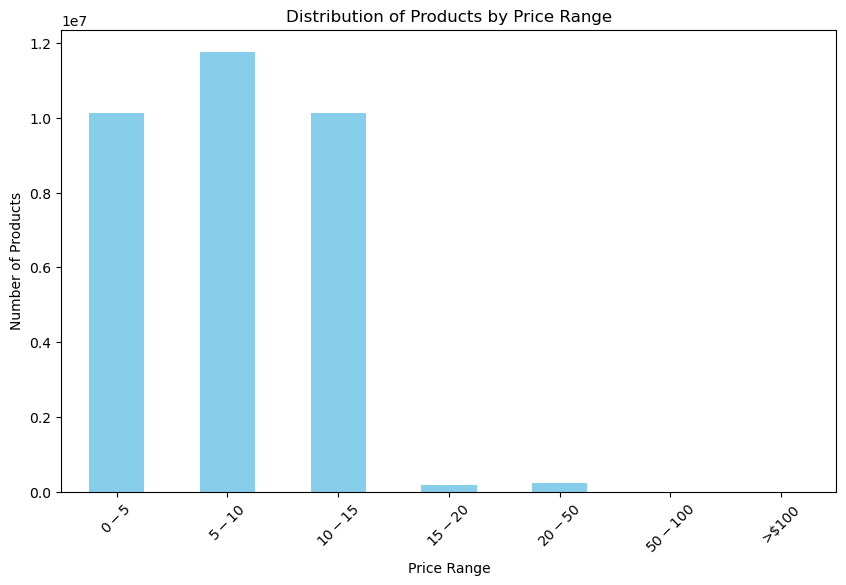

In [2]:
# Define price ranges
price_bins = [0, 5, 10, 15, 20, 50, 100, df['prices'].max()]
price_labels = ['$0-$5', '$5-$10', '$10-$15', '$15-$20', '$20-$50', '$50-$100', '>$100']

# Create a new column for price range
df['price_range'] = pd.cut(df['prices'], bins=price_bins, labels=price_labels, include_lowest=True)

# Count the number of products in each price range
price_range_counts = df['price_range'].value_counts().sort_index()

# Plot the distribution of products by price range
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

### Answer to Question 3

The distribution of products by price range can be summarized as follows:

- The majority of the products are priced between $0 and $15.
- Specifically, there are three main price ranges that dominate the product prices:
  - $0-$5: This range has a significant number of products.
  - $5-$10: This range has the highest number of products.
  - $10-$15: This range also has a substantial number of products, although slightly less than the $0-$5 and $5-$10 ranges.
- There are very few products in the higher price ranges:
  - $15-$20: A minimal number of products fall into this range.
  - $20-$50: Very few products are priced within this range.
  - $50-$100 and >$100: These ranges have almost no products.

This information suggests that the majority of Instacart's product offerings are in the lower price ranges, specifically between $0 and $15. This insight can help marketing and sales teams focus their efforts on promoting products within these popular price ranges. Additionally, understanding that higher-priced products are less common might inform the type of products they choose to advertise at different times.
